# PROJECT

Mô tả:

Công ty đang lên kế hoạch nhập một lô hàng laptop để bán với đối tượng khách hàng mà họ hướng đến là sinh viên nhưng hiện tại công ty vẫn chưa hình dùng ra được là khách hàng của họ đang quan tâm và thật sự thích về những dòng máy tính như thế nào trên thị trường và liệu là chi phí của họ sẵn sàng bỏ ra với mức giá bao nhiêu để mua các sản phẩm đó, liệu là họ thích thương hiệu nào hơn,.. Dựa vào nguồn data mà công ty đã thu thập từ trước từ nhiều nguồn khác nhau, Công ty muốn biết được chân dung của khách hàng để từ đó nhập về sản phẩm phù hợp với yêu cầu của khách hàng đồng thời bảo đảm về mặt chi phí cũng như không bị vấn đề tồn kho.

# Business question 

Từ nguồn dữ liệu đã thu thập phân tích chân dung của khách hàng từ đó mô tả các đặc trưng của khách hàng mua máy tính

# Data Description

Bộ dữ liệu đươc chia thành 2 file

## CustomerProfile:

NamHocThu: Năm học hiện tại của sinh viên

ChuyenNganh: Chuyên ngành học của sinh viên

NgheNghiepGiaDinh: Nghề nghiệp của gia đình sinh viên

ChiTieuHangThang: Số tiền chi tiêu hàng tháng của sinh viên

ThoiGianSuDung: Thời gian sử dụng laptop

MucDichSuDungLaptop: Các mục đích sử dụng laptop

MucDoHaiLong: Mức độ Yêu cầu sản phẩm phải đáp ứng nhu cầu

Nhóm các yếu tố cân nhắc khi chọn mua laptop bao gồm:

YeuToThuongHieuSP: Yếu Tố Thương Hiệu Sản Phẩm

Yeu To Cau Hinh: Yếu Tố Cấu Hình

Yeu To Toc Do Xu Ly: Yếu Tố Tốc Độ Xử Lý

Yeu To Gia: Yếu Tố Giá

Yeu To Thiet Ke: Yếu Tố Thiết Kế

Yeu To Uy Tin Nha Ban le: Yếu Tố Uy Tín Nhà Bán Lẻ

Yeu To Bao Mat: Yếu Tố Bảo Mật

Yeu To Bao Hanh: Yếu Tố Bảo Hành

Yeu To Khuyen Mai: Yếu Tố Khuyến Mãi

## SaleFile:

Channel:  Kênh mua sắm

PaymentType:  Hình thức thanh toán

Brand:  Thương hiệu laptop

Shop:  Cửa hàng

Promotion: Khuyến mãi

Reference:  Kênh thông tin biết đến sản phẩm và cửa hàng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import plotly.express as px
pd.set_option('display.max_rows', None)  # Hiển thị toàn bộ dòng
pd.set_option('display.max_columns', None)  # Hiển thị toàn bộ cột
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
from datetime import datetime

In [2]:
CustomerData = pd.read_excel('Data/CapstoneProject_Dataset.xlsx', sheet_name= 'CustomerProfile')
SaleData = pd.read_excel('Data/CapstoneProject_Dataset.xlsx', sheet_name='Sale', parse_dates=['SaleDate'])
df = CustomerData.merge(SaleData, left_on= 'KH_ID', right_on = 'CustomerID', how = 'inner')
df.drop('CustomerID', axis = 1 , inplace= True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   KH_ID                1566 non-null   object
 1   GioiTinh             1566 non-null   object
 2   QueQuan              1566 non-null   object
 3   NamHocThu            1566 non-null   object
 4   ChuyenNganh          1566 non-null   object
 5   NgheNghiepGiaDinh    1566 non-null   object
 6   ChiTieuHangThang     1566 non-null   object
 7   ThoiGianSuDung       1566 non-null   object
 8   MucDichSuDungLaptop  1566 non-null   object
 9   MucDoHaiLong         1566 non-null   int64 
 10  YeuToThuongHieuSP    1566 non-null   int64 
 11  YeuToCauHinh         1566 non-null   int64 
 12  YeuToTocDoXuLy       1566 non-null   int64 
 13  YeuToGia             1566 non-null   int64 
 14  YeuToThietKe         1566 non-null   int64 
 15  YeuToUyTinNhaBanle   1566 non-null   int64 
 16  YeuToB

In [4]:
df.head()

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác",5,3,3,3,3,3,3,3,3,3,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, Website"
2,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội"
3,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn
4,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4,OTS40774,Offline,Tiền mặt,Acer,Phong Vũ,Không,10172000,2020-12-10 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop"


# Xác định các thuộc tính

In [5]:
numerical_column = ['SalePrice']

norminal_column = df.select_dtypes(include = 'object').columns.to_list()

not_norminal_colmn = ['KH_ID', 'OrderID', 'SaleDate', 'SalePrice']

for column in not_norminal_colmn:
    norminal_column.remove(column)

not_ordinal_column =list(set(numerical_column))+ list(set(norminal_column)) + list(set(['KH_ID', 'OrderID', 'SalePrice']))

ordinal_column = df.drop(not_ordinal_column , axis= 1).columns.to_list()

print('\nnumerical_column: \n', numerical_column)

print('\nnorminal_column: \n', norminal_column)

print('\nordinal_column: \n', ordinal_column)


numerical_column: 
 ['SalePrice']

norminal_column: 
 ['GioiTinh', 'QueQuan', 'NamHocThu', 'ChuyenNganh', 'NgheNghiepGiaDinh', 'ChiTieuHangThang', 'ThoiGianSuDung', 'MucDichSuDungLaptop', 'Channel', 'PaymentType', 'Brand', 'Shop', 'Promotion', 'Reference']

ordinal_column: 
 ['MucDoHaiLong', 'YeuToThuongHieuSP', 'YeuToCauHinh', 'YeuToTocDoXuLy', 'YeuToGia', 'YeuToThietKe', 'YeuToUyTinNhaBanle', 'YeuToBaoMat', 'YeuToBaoHanh', 'YeuToKhuyenMai', 'SaleDate']


# Data Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   KH_ID                1566 non-null   object
 1   GioiTinh             1566 non-null   object
 2   QueQuan              1566 non-null   object
 3   NamHocThu            1566 non-null   object
 4   ChuyenNganh          1566 non-null   object
 5   NgheNghiepGiaDinh    1566 non-null   object
 6   ChiTieuHangThang     1566 non-null   object
 7   ThoiGianSuDung       1566 non-null   object
 8   MucDichSuDungLaptop  1566 non-null   object
 9   MucDoHaiLong         1566 non-null   int64 
 10  YeuToThuongHieuSP    1566 non-null   int64 
 11  YeuToCauHinh         1566 non-null   int64 
 12  YeuToTocDoXuLy       1566 non-null   int64 
 13  YeuToGia             1566 non-null   int64 
 14  YeuToThietKe         1566 non-null   int64 
 15  YeuToUyTinNhaBanle   1566 non-null   int64 
 16  YeuToB

In [7]:
# Xây dựng hàm check_null
def check_null_data(data):
    column = []
    null_count = []
    null_percent = []
    columns = data.columns
    for x in columns:
        column.append(x)
        ColumnNullCount = data[x].isnull().sum()
        null_count.append(ColumnNullCount)
        ColumnNullCountPercent = round(ColumnNullCount/data.shape[0]*100,3)
        null_percent.append(ColumnNullCountPercent)
    null_df = pd.DataFrame({
        'Columnn': column,
        'ColumnNullCount': null_count,
        'ColumnNUllPercent': null_percent
    })
    null_df = null_df.sort_values(by = 'ColumnNullCount', ascending= False)
    null_df = null_df.loc[null_df['ColumnNullCount']>0, :]
    print('Bảng dữ liệu thống kê các cột dữ liệu có chứa giá trị null'.title().center(60))
    if null_df.shape[0] > 0:
        return null_df
    else:
        print('Giá trị null không tồn tại trong DataFrame này'.upper().center(60))
        print('Hãy thử với DataFrame khác')
        print('==================END==============='.center(60))

In [8]:
check_null_data(df)

 Bảng Dữ Liệu Thống Kê Các Cột Dữ Liệu Có Chứa Giá Trị Null 


,Columnn,ColumnNullCount,ColumnNUllPercent
19,OrderID,7,0.447
25,SalePrice,6,0.383
23,Shop,5,0.319
20,Channel,3,0.192
27,Reference,2,0.128
22,Brand,2,0.128
21,PaymentType,2,0.128


__Nhận xét:__

2 cột SaleDate và SalePrice bản chất nó phải là kiểu số nhưng nó đang là cột có kiểu dữ liệu object

Đồng thời các cột OrderID, SalePrice, Shop, Channel, Reference, Brand, PaymentType	chứa giá trị  nan

In [9]:
# Xử lý các thuộc tính có kiểu dữ liệu không hợp lệ

In [10]:
# Xử lý cho cột SalePrice

In [11]:
# Xây dựng hàm xem giá trị unique của một cột nào đó được liệt kê trong list column
def unique_value(data, ListColumn):
    for x in ListColumn:
        print(f'\nUnique of {x}:\n',*data[x].unique())

In [12]:
# xây dựng hàm lọc ra những trường hợp value khác với các giá trị còn lại trong cột với các dữ liệu khác thời gian
def find_other_values(list_value, data_type):
    try:
        ndim = list_value.ndim
        assert ndim == 1, 'Mảng truyền vào phải là mảng 1 chiều'
    except AssertionError as e:
        raise ValueError(e)
    else:
        result = []
        for x in list_value:
            try:
                data_type(x)
            except ValueError:
                result.append(x)
        if len(result) == 0:
            print('Không có dữ liệu khác với các giá trị còn lại')
            return None
        else:
            return result

In [13]:
# xây dựng hàm lọc ra những trường hợp value khác với các giá trị còn lại trong cột chứa dữ liệu thời gian
def time_find_other_values(list_value, format):
    try:
        ndim = list_value.ndim
        assert ndim == 1, 'Mảng truyền vào phải là mảng 1 chiều'
    except AssertionError as e:
        raise ValueError(e)
    else:
        result = []
        for x in list_value:
            try:
                pd.to_datetime(x, format = format)
            except ValueError:
                result.append(x)
        if len(result) == 0:
            print('Không có dữ liệu khác với các giá trị còn lại')
            return None
        else:
            return result

In [14]:
SalePrice_other_values = find_other_values(df['SalePrice'], float)
print(SalePrice_other_values)

['$2139', '$1630', '$2397', '$2742', '$1733', '$2846', '$1229', '$1553', '$1751', '$2144', '$2046', '$1959', '$2632', '$1361', '$2572', '$1638', '$2662', '$1310', '$2648', '$1326', '$1208', '$1949', '$2917', '$2252', '$1662', '$1964', '$2219', '$2204', '$2947', '$2090', '$1360', '$1438', '$1587', '$1772', '$2162', '$1893', '$1809', '$2627']


__Nhận xét__

Giá trị không đồng nhất trong cột SalePrice ví dụ có các giá trị như 2139 đô la, 1630 đô hoặc có những giá trị chỉ đơn giản là 2550 không hề có một đơn vị tiền tệ phía sau chính những điều này dẫn đến việc SalePrice có kiểu dữ liệu object

Các giá trị này có thể là các khách ở nước ngoài họ thanh toán băng tiền Đô la. Mặc khác dữ liệu này được thu thập vào năm 2021 nên không thể biêt chính xác lúc bây giờ 1usd = bao nhiêu VNĐ cho nên trong bài này tôi sẽ lấy theo giá trị hiện hành bây giờ 1usd =  24315 VNĐ 

In [15]:
UsdtoVnd =  24315 
# fix giá trị trong SalePrice
df['SalePrice'] = df['SalePrice'].apply(lambda x: f'${x}' if len(str(x)) < 5 else x)
df['SalePrice'] = df['SalePrice'].apply(lambda x: (float(str(x).replace('$',''))* UsdtoVnd) if '$' in str(x) else float(x))

In [16]:
print('After fix, dtype of SalePrice is: ', df['SalePrice'].dtypes)
SalePrice_other_values = find_other_values(df['SalePrice'], float)

After fix, dtype of SalePrice is:  float64
Không có dữ liệu khác với các giá trị còn lại


In [17]:
# Xử lý dữ liệu cho cột SaleDate

In [18]:
time_other_values = time_find_other_values(df['SaleDate'], format = '%Y-%m-%d %H:%M:%S')
print(time_other_values)

['2/30/2020', '9/31/2020', '2/31/2020', '2/31/2020']


__Nhận xét:__

Những giá trị ngày: ['2/30/2020', '9/31/2020', '2/31/2020', '2/31/2020']  vượt quá ngưỡng và không xuất hiện trong lịch vì tháng 2 không thể có ngày thứ 30 hoặc ngày 31 mặc khác 2020 là năm nhuận nên tháng 2 có 29 ngày cho nên ta có thể quy ngày 30 và 31 của tháng 2 về ngày 29

In [19]:
df.loc[df['SaleDate'] == '2/31/2020', 'SaleDate'] = '2/29/2020'
df.loc[df['SaleDate'] == '2/30/2020', 'SaleDate'] = '2/29/2020'
df.loc[df['SaleDate'] == '9/31/2020', 'SaleDate'] = '9/30/2020'

In [20]:
def fix_time(x, format1, format2):
    try:
        return datetime.strptime(x, format1)
    except ValueError:
        return datetime.strptime(x, format2)

df['SaleDate'] = df['SaleDate'].apply(fix_time, format1='%Y-%m-%d %H:%M:%S', format2='%m/%d/%Y')

In [21]:
df['SaleDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1566 entries, 0 to 1565
Series name: SaleDate
Non-Null Count  Dtype         
--------------  -----         
1566 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.4 KB


In [22]:
df[norminal_column].head(5)

,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,Channel,PaymentType,Brand,Shop,Promotion,Reference
0,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác",Offline,Tiền mặt,Apple,Viettel Store,Không,Nhân viên cửa hàng bán Laptop
1,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",Offline,Tiền mặt,Dell,FPT Shop,Có,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, Website"
2,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",Offline,Tiền mặt,MSI,Phong Vũ,Không,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội"
3,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",Offline,Tiền mặt,Asus,Thế giới di động,Có,Nhờ người có chuyên môn tư vấn
4,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",Offline,Tiền mặt,Acer,Phong Vũ,Không,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop"


# Phân tích SalePrice

In [23]:
def box_dist_plot(data, column):
    plt.figure(figsize=(18,10))
    
    plt.subplot(1,2,1)
    sns.boxplot(x = data[column], orient='h')
    plt.title(f'Box plot of {column}', fontsize = 16)
    
    plt.subplot(1,2,2)
    sns.distplot(x = data[column])
    plt.title(f'Distplot of {column}',fontsize = 16)
    
    plt.tight_layout()
    plt.show()

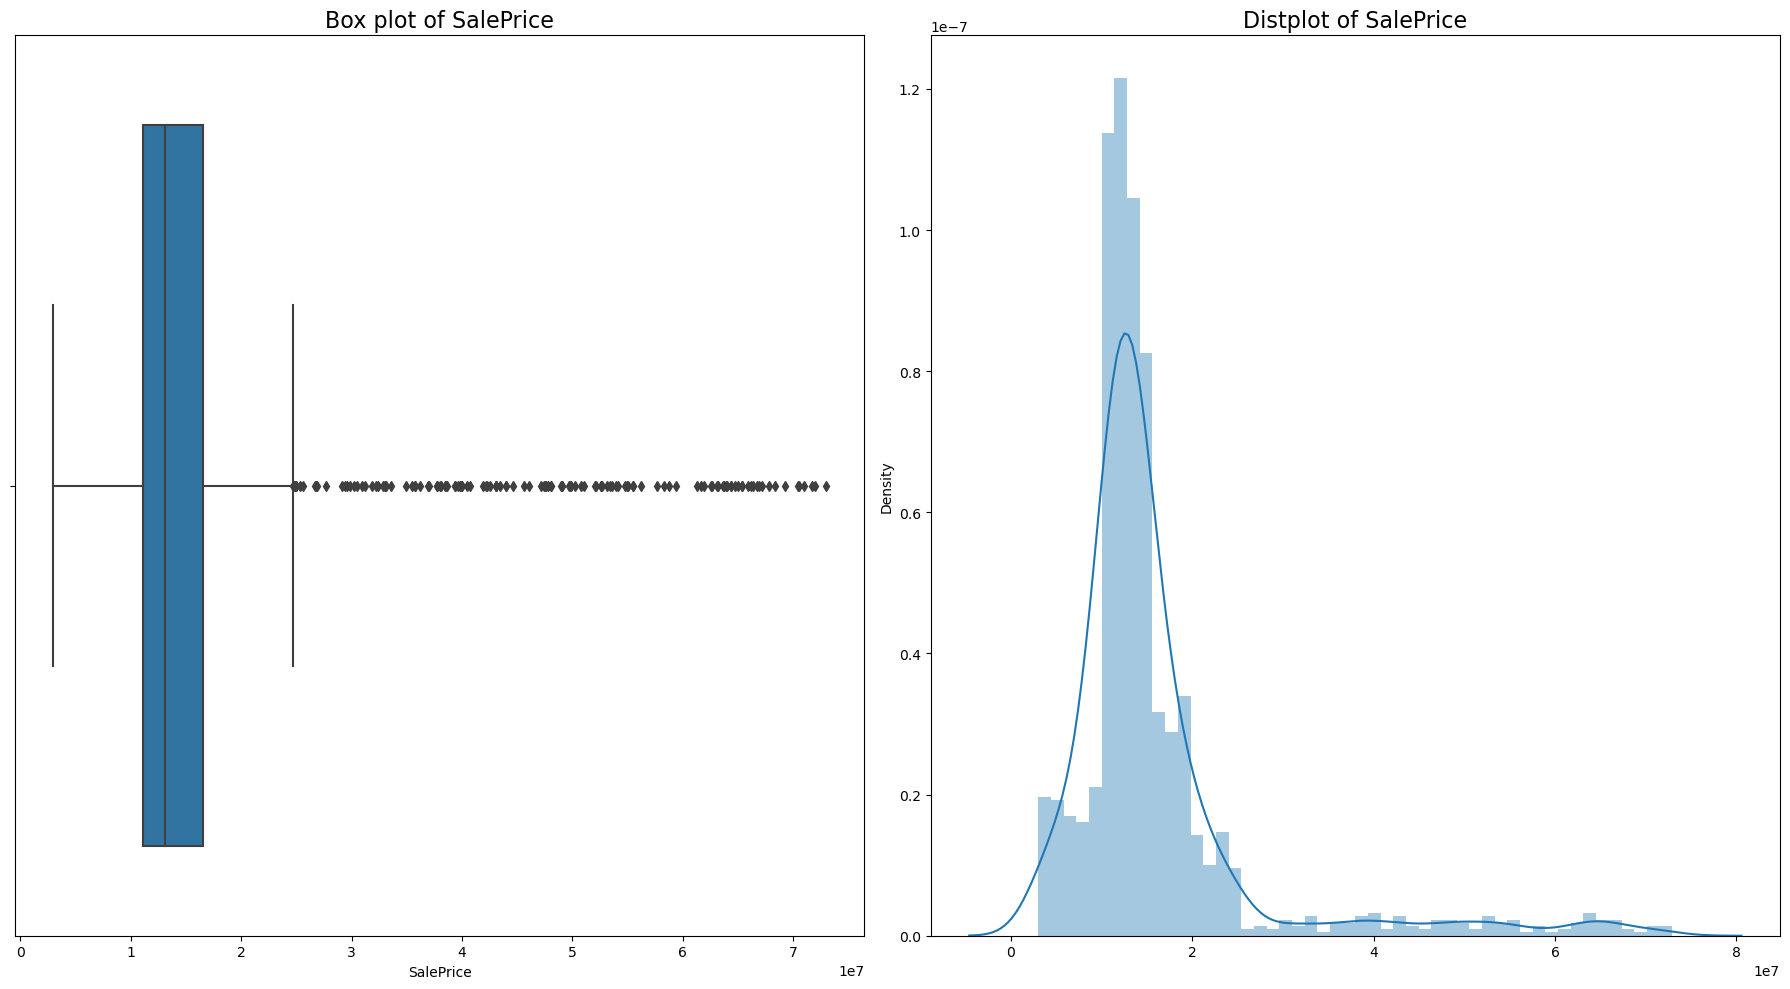

In [24]:
box_dist_plot(df, 'SalePrice')

__Nhận xét:__

Giá bán tập trung phần lớn trong khoảng từ 7.000.000 VNĐ đến 25.000.000 VNĐ ==> khách hàng thuộc phân khúc thấp hoặc tập trung là chủ yếu. Tuy nhiên lại có rất nhiều outlier, có thể là outlier hợp lệ hoặc không. Việc xảy ra outlier không hợp lệ có thể xuất phát từ việc nhập dữ liệu bị sai hoặc thống kê sai, những đối tượng này không phải là sinh viên là người đã đi làm chẳng hạn. Sẽ xem xét cho những trường hợp outlier này sau

# Phân tích tổng quan xem xét các thuộc tính tương quan với SalePrice từ đó đánh giá các outlier 

In [25]:
def categorical_property_price_comparison(data, InputColumn, OutputColumn):
    result = data.groupby(InputColumn).agg(LaptopNum=(OutputColumn, lambda x: x.size),
                                           LaptopNumPercent=(OutputColumn, lambda x: round((x.size / data.shape[0] * 100), 3)),
                                           MedianSalePrice=(OutputColumn, 'median'))
    result.reset_index(inplace=True)
    result = result.sort_values('LaptopNum', ascending=False)
    return result

In [26]:
for i, column in enumerate(norminal_column):
    print(f'\nSTT {i+1} - Bảng dữ liệu phân tích SalePrice theo {column}\n'.upper())
    result = categorical_property_price_comparison(df, column, 'SalePrice')    
    display(result)
    print()
    print()


STT 1 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO GIOITINH



,GioiTinh,LaptopNum,LaptopNumPercent,MedianSalePrice
1,Nữ,922,58.876,12640000.0
0,Nam,644,41.124,14150000.0





STT 2 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO QUEQUAN



,QueQuan,LaptopNum,LaptopNumPercent,MedianSalePrice
4,Hồ Chí Minh,276,17.625,14855000.0
2,Hà Nội,162,10.345,12398500.0
12,Quảng Trị,134,8.557,12760000.0
15,Đà Nẵng,134,8.557,14875000.0
0,Bình Định,122,7.791,12865000.0
16,Đắk Lắk,105,6.705,12390000.0
14,Thừa Thiên Huế,97,6.194,12829500.0
9,Quảng Bình,87,5.556,12284000.0
1,Gia Lai,86,5.492,13240000.0
3,Hà Tĩnh,80,5.109,13250000.0





STT 3 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO NAMHOCTHU



,NamHocThu,LaptopNum,LaptopNumPercent,MedianSalePrice
2,Năm 3,508,32.439,13297000.0
1,Năm 2,435,27.778,12742000.0
3,Năm 4,390,24.904,13155000.0
0,Năm 1,233,14.879,13615000.0





STT 4 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO CHUYENNGANH



,ChuyenNganh,LaptopNum,LaptopNumPercent,MedianSalePrice
21,Thương mại,202,12.899,12075000.0
9,Ngoại thương,172,10.983,15650000.0
22,Thương mại điện tử,140,8.940,13250000.0
6,Kế toán,114,7.280,12160000.0
5,Kiểm toán,97,6.194,13160000.0
0,Hệ thống thông tin quản lý,91,5.811,15560000.0
8,Luật kinh tế,67,4.278,12742000.0
7,Luật,64,4.087,12582000.0
24,Truyền thông Marketing,62,3.959,13893000.0
13,Quản trị Marketing,61,3.895,13340000.0





STT 5 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO NGHENGHIEPGIADINH



,NgheNghiepGiaDinh,LaptopNum,LaptopNumPercent,MedianSalePrice
3,Nông dân,724,46.232,12150000.0
0,Công chức nhà nước,358,22.861,14245500.0
1,Kinh doanh tự do,334,21.328,14480000.0
2,Nhân viên văn phòng,150,9.579,13990000.0





STT 6 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO CHITIEUHANGTHANG



,ChiTieuHangThang,LaptopNum,LaptopNumPercent,MedianSalePrice
2,Từ 1.500.000 đến 3.000.000,900,57.471,12760000.0
3,Từ 3.000.000 đến 5.000.000,438,27.969,15445500.0
0,Dưới 1.500.000,161,10.281,10430000.0
1,Trên 5.000.000,67,4.278,20000000.0





STT 7 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO THOIGIANSUDUNG



,ThoiGianSuDung,LaptopNum,LaptopNumPercent,MedianSalePrice
1,Trên 2 năm,596,38.059,12931000.0
2,Từ 1 năm đến 2 năm,505,32.248,13101000.0
3,Từ 6 tháng - 1 năm,312,19.923,13970000.0
0,Dưới 6 tháng,153,9.770,13115000.0





STT 8 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO MUCDICHSUDUNGLAPTOP



,MucDichSuDungLaptop,LaptopNum,LaptopNumPercent,MedianSalePrice
16,"Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)",266,16.986,13200000.0
11,"Học tập, Làm việc",253,16.156,12697000.0
4,Học tập,253,16.156,12365000.0
13,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",228,14.559,14515000.0
9,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",171,10.920,12046000.0
6,"Học tập, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",80,5.109,12870000.0
12,"Học tập, Làm việc, Chơi game",73,4.662,15750000.0
5,"Học tập, Chơi game",73,4.662,14480000.0
14,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác",60,3.831,14488000.0
20,Làm việc,23,1.469,14850000.0





STT 9 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO CHANNEL



,Channel,LaptopNum,LaptopNumPercent,MedianSalePrice
0,Offline,787,50.255,13166000.0
1,Online,776,49.553,13127500.0





STT 10 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO PAYMENTTYPE



,PaymentType,LaptopNum,LaptopNumPercent,MedianSalePrice
0,Thẻ,1179,75.287,13127500.0
1,Tiền mặt,385,24.585,13215000.0





STT 11 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO BRAND



,Brand,LaptopNum,LaptopNumPercent,MedianSalePrice
2,Asus,401,25.607,12210000.0
3,Dell,348,22.222,13080000.0
4,HP,272,17.369,13394500.0
0,Acer,182,11.622,12430000.0
1,Apple,143,9.132,30515325.0
6,MSI,134,8.557,12935000.0
5,Lenovo,57,3.640,12920000.0
7,Microsoft,27,1.724,20460000.0





STT 12 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO SHOP



,Shop,LaptopNum,LaptopNumPercent,MedianSalePrice
1,FPT Shop,293,18.710,13870000.0
7,Thế giới di động,262,16.731,12465000.0
10,Điện máy xanh,177,11.303,13430000.0
5,Phong Vũ,169,10.792,12610000.0
9,Viễn thông A,166,10.600,12678000.0
6,Techcare,165,10.536,12400000.0
3,Nguyễn Kim,112,7.152,12833000.0
8,Viettel Store,91,5.811,14560000.0
2,Khác,81,5.172,14370000.0
4,Phi Long Technology,25,1.596,16610000.0





STT 13 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO PROMOTION



,Promotion,LaptopNum,LaptopNumPercent,MedianSalePrice
0,Có,939,59.962,12825000.0
1,Không,627,40.038,13718000.0





STT 14 - BẢNG DỮ LIỆU PHÂN TÍCH SALEPRICE THEO REFERENCE



,Reference,LaptopNum,LaptopNumPercent,MedianSalePrice
46,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop",140,8.940,12790000.0
63,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Nhân viên cửa hàng bán Laptop",116,7.407,13590000.0
60,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Mạng xã hội",106,6.769,13466500.0
5,Nhân viên cửa hàng bán Laptop,105,6.705,13200000.0
37,"Thông qua người thân, bạn bè",101,6.450,13250000.0
48,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội",85,5.428,12990000.0
58,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn",78,4.981,13265000.0
20,"Nhờ người có chuyên môn tư vấn, Nhân viên cửa hàng bán Laptop",69,4.406,12960000.0
53,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Phương tiện truyền thông (báo, tivi,...)",46,2.937,11713000.0
56,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Website",40,2.554,12529500.0


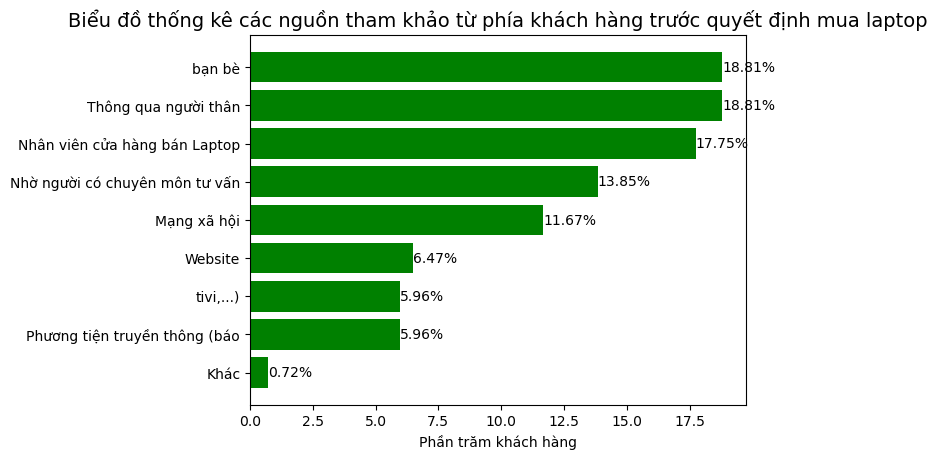

In [27]:
Ref = df[["KH_ID","Reference"]]

Ref.drop_duplicates(inplace = True)

ref = Ref['Reference'].str.split(", ", expand = True)

ref.columns.astype(str)

ref = ref.melt(value_vars = [0 , 1,	2, 3, 4, 5, 6, 7,	8], var_name = 'refby')

ref.dropna(how = 'any', inplace = True)

ref.drop("refby", axis = 1, inplace = True)

ref.columns = ["Refby"]

ref_counts = (ref.value_counts(normalize=True) * 100).sort_values(ascending=True)

# Chuyển đổi tuples thành chuỗi
ref_labels = [', '.join(item) for item in ref_counts.index]

plt.barh(ref_labels, ref_counts.values, color = 'green')
plt.xlabel("Phần trăm khách hàng")
plt.title('Biểu đồ thống kê các nguồn tham khảo từ phía khách hàng trước quyết định mua laptop', fontsize=14)

# Thêm số liệu trên các cột
for i, v in enumerate(ref_counts.values):
    plt.text(v, i, f"{v:.2f}%", va='center')

plt.show()

__Nhận xét__

Khách hàng của tệp dữ  liệu  đa số là nữ  tuy nhiên nếu xét điểm trung vị về giá bán, các khách hàng nam chi tiền nhiều hơn  khách hàng nữ

Đa phần khách hàng mua máy đều là sinh viên năm 2 trở lên nghĩa là họ đã có thời gian sử dụng laptop rồi cho nên họ biết họ cần điều gì cho một máy tính mới. Cần đặc biệt quan tâm đến mức độ hài lòng về chiếc máy tính cũ của họ. Vì thế đội ngũ bán hàng của cửa hàng cần phải tập trung vào lý do vì sao họ lại mua máy tính mới. Máy tính cũ không đáp ứng những điều gì cho nhu cầu của họ. Và cần phải cố gắng biết chính xác giá tiền hoặc máy cũ của họ sử dụng là gì để tư vấn laptop cho phù hợp 

Phần lớn sinh viên của cửa hàng đa số họ đến từ những ngành xã hội, kinh tế  không nặng về kĩ thuật nên một chiếc máy tính mạnh về cấu hình, phần cứng có thể xử lý những tác vụ mạnh có thể là điều không cần thiết đối với họ 
Nghề nghiệp gia đình chủ yếu là nông dân công chức nhà nước hoặc kinh doanh tự do và mức giá trung vị có sự chênh lệch giữa nghề nghiệp của gia đình với nhau như những khách hàng có bố mẹ là công chức nhà nước hoặc kinh doanh tự do sẽ có khoảng chi cao  hơn những gia đình có xuất phát là nông dân nhưng cách biệt không quá lớn. Có khả năng trong dataset này những ngành nghề mà họ học không nặng về tính kĩ thuật cho nên mức giá họ dành cho các sản phẩm không cao nên ta không nhìn ra sự khác biệt giữa khả năng chi tiêu giữa các khách hàng có nghề nghiệp gia đình khác nhau

Khách hàng của dataset phần lớn  chi tiêu hàng tháng là từ 1.5 đến 3 triệu (chiếm 57%)  trong khi đó từ 3 đến 5 triệu là 28% dưới 1 triệu rưỡi là 11% và trên 5 triệu là 4%. Mặc khác khoảng  chi tiêu hàng tháng ảnh  hưởng không nhỏ đến khả năng chi tiêu dành cho sản phẩm. Trong dữ liệu cho thấy rằng những người có khoảng chi tiêu hàng tháng cao hơn sẽ dành điều kiện nhiều hơn cho chiếc laptop của mình. Cu thể  chi tiêu hàng tháng  dưới 1.5 triệu họ thường dành ra trên dưới 11 triệu, từ 1.5 đến 3 là trên dưới 13 triệu,  từ 3 triệu đến 5 triệu là trên dưới 16 triệu và trên 5 triệu tiền chi tiền hàng tháng thì thường trên dưới  20 triệu

Khách hàng sử dụng thẻ để thanh toán chiếm số lượng áp đảo so với dùng tiền mặt cho nên cửa hàng  phải hỗ trợ các phương thức để khách hàng có thể thực hiện việc thanh toán này

Những sản phẩm đến từ nhà Asus, Dell, Hp chiếm số lượng khách hàng nhiều hơn các nhà còn lại phần lớn họ thường chi từ 12 đến 15 triệu cho sản phẩm của những nhà này  . Tuy nhiên nếu xét về mặt giá cả các khách hàng chi cho sản phẩm Apple hay Microsoft có khoảng chi cách biệt rất lớn so với Asus, Dell, Hp khoảng chi thường trên 20 triệu nhưng số lượng của Microsoft chỉ là 2% và apple là 9%

Khách hàng tham khảo ý kiến từ bạn bè và người thân chiếm 37% cho nên cửa hàng phải thực hiện tốt nghiệp vụ CRM của mình để tạo hiệu ứng domino cho khách hàng. Đồng thời khách hàng cũng rất quan tâm đến ý kiến từ nhân viên của cửa hàng vì thế nhân viên bán hàng phải được đào tạo nghiệp vụ bán hàng kĩ càng am hiểu sản phẩm để tạo lòng tin cho khách hàng cũng như tăng khả năng chốt đơn. Ngoài ra cửa hàng nên thực hiện các hoạt động quảng cáo trên các kênh xã hội để tăng khả năng nhận diện đến khách hàng

In [28]:
for i, column in enumerate(ordinal_column):
    print(f'\nSTT {i+1} - Bảng dữ liệu phân tích SalePrice theo {column}\n')
    result = categorical_property_price_comparison(df, column, 'SalePrice')    
    display(result)
    print()
    print()


STT 1 - Bảng dữ liệu phân tích SalePrice theo MucDoHaiLong



,MucDoHaiLong,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,662,42.273,13230000.0
2,3,477,30.460,12670000.0
4,5,344,21.967,14499500.0
1,2,80,5.109,11920000.0
0,1,3,0.192,11800000.0





STT 2 - Bảng dữ liệu phân tích SalePrice theo YeuToThuongHieuSP



,YeuToThuongHieuSP,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,737,47.063,12810000.0
2,3,347,22.158,13040000.0
1,2,252,16.092,12840000.0
4,5,224,14.304,16085000.0
0,1,6,0.383,12280000.0





STT 3 - Bảng dữ liệu phân tích SalePrice theo YeuToCauHinh



,YeuToCauHinh,LaptopNum,LaptopNumPercent,MedianSalePrice
2,3,521,33.269,12610000.0
3,4,432,27.586,13885000.0
4,5,313,19.987,14735000.0
1,2,287,18.327,12070000.0
0,1,13,0.830,13199000.0





STT 4 - Bảng dữ liệu phân tích SalePrice theo YeuToTocDoXuLy



,YeuToTocDoXuLy,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,594,37.931,13500000.0
2,3,537,34.291,12395000.0
4,5,349,22.286,14560000.0
1,2,75,4.789,12298000.0
0,1,11,0.702,13340000.0





STT 5 - Bảng dữ liệu phân tích SalePrice theo YeuToGia



,YeuToGia,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,864,55.172,13040000.0
2,3,352,22.478,13685000.0
4,5,282,18.008,12930000.0
1,2,53,3.384,14340000.0
0,1,15,0.958,13340000.0





STT 6 - Bảng dữ liệu phân tích SalePrice theo YeuToThietKe



,YeuToThietKe,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,479,30.587,13100000.0
2,3,452,28.863,12582000.0
1,2,337,21.520,13078500.0
4,5,256,16.347,15400000.0
0,1,42,2.682,13050000.0





STT 7 - Bảng dữ liệu phân tích SalePrice theo YeuToUyTinNhaBanle



,YeuToUyTinNhaBanle,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,612,39.080,13085000.0
2,3,444,28.352,12790000.0
4,5,290,18.519,14043000.0
1,2,201,12.835,13250000.0
0,1,19,1.213,11330000.0





STT 8 - Bảng dữ liệu phân tích SalePrice theo YeuToBaoMat



,YeuToBaoMat,LaptopNum,LaptopNumPercent,MedianSalePrice
2,3,488,31.162,12967000.0
1,2,471,30.077,12360000.0
3,4,388,24.777,14217500.0
4,5,140,8.940,14400000.0
0,1,79,5.045,12970000.0





STT 9 - Bảng dữ liệu phân tích SalePrice theo YeuToBaoHanh



,YeuToBaoHanh,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,721,46.041,13065000.0
2,3,414,26.437,13168500.0
4,5,370,23.627,13395500.0
1,2,49,3.129,13250000.0
0,1,12,0.766,12604500.0





STT 10 - Bảng dữ liệu phân tích SalePrice theo YeuToKhuyenMai



,YeuToKhuyenMai,LaptopNum,LaptopNumPercent,MedianSalePrice
3,4,714,45.594,13050000.0
2,3,370,23.627,13590000.0
4,5,369,23.563,12763000.0
1,2,92,5.875,14519000.0
0,1,21,1.341,13110000.0





STT 11 - Bảng dữ liệu phân tích SalePrice theo SaleDate



,SaleDate,LaptopNum,LaptopNumPercent,MedianSalePrice
59,2020-02-27,12,0.766,14623500.0
28,2020-01-27,11,0.702,13220000.0
61,2020-02-29,11,0.702,13503000.0
232,2020-08-21,11,0.702,12860000.0
222,2020-08-11,10,0.639,11940000.0
242,2020-08-31,10,0.639,11634000.0
325,2020-11-22,9,0.575,13780000.0
169,2020-06-17,9,0.575,12520000.0
253,2020-09-11,9,0.575,12879000.0
41,2020-02-09,9,0.575,14021000.0


In [29]:
# Thực hiện ANOVA để xem xét môi tương quan giữa các biến ordinal với output SalePrice

In [30]:
ordinal_column.remove('SaleDate')
Anova = pd.concat([df[ordinal_column], df['SalePrice']], axis = 1)
Anova.head(5)

,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,SalePrice
0,5,3,3,3,3,3,3,3,3,3,3020000.0
1,4,4,5,5,4,3,4,1,5,5,18310000.0
2,4,4,3,4,4,3,4,2,4,4,12203000.0
3,4,4,3,4,4,3,4,2,4,4,13070000.0
4,4,4,3,4,4,3,4,2,4,4,10172000.0


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
string = 'SalePrice ~ '
for x in Anova.drop('SalePrice', axis = 1).columns:
    string += f'C({x}) + '
string = string.rstrip('+ ')
string

'SalePrice ~ C(MucDoHaiLong) + C(YeuToThuongHieuSP) + C(YeuToCauHinh) + C(YeuToTocDoXuLy) + C(YeuToGia) + C(YeuToThietKe) + C(YeuToUyTinNhaBanle) + C(YeuToBaoMat) + C(YeuToBaoHanh) + C(YeuToKhuyenMai)'

In [33]:
#Đặt giả thiết

# Ho là 2 biến độc lập với nhau
# Ha là 2 biến phụ thuộc với nhau

In [34]:
model = ols(string, data= Anova).fit()
anova_tab = sm.stats.anova_lm(model, typ = 2)
anova_tab

,sum_sq,df,F,PR(>F)
C(MucDoHaiLong),2.065224e+15,4.0,4.904117,6.256175e-04
C(YeuToThuongHieuSP),1.547924e+15,4.0,3.675726,5.504769e-03
C(YeuToCauHinh),9.410691e+14,4.0,2.234679,6.317229e-02
C(YeuToTocDoXuLy),8.127136e+14,4.0,1.929884,1.030000e-01
C(YeuToGia),2.798266e+15,4.0,6.644810,2.668848e-05
C(YeuToThietKe),4.092286e+15,4.0,9.717613,9.236893e-08
C(YeuToUyTinNhaBanle),5.982972e+14,4.0,1.420727,2.246837e-01
C(YeuToBaoMat),7.866375e+14,4.0,1.867963,1.135560e-01
C(YeuToBaoHanh),1.126440e+14,4.0,0.267486,8.989597e-01
C(YeuToKhuyenMai),2.109985e+15,4.0,5.010407,5.170306e-04


Vì p < 0.05 bác bỏ H0. Kết luận: Tất cả các biến ordinal đều tác động đến SalePrice (giá bán)

__Nhận xét:__

Thông qua bảng phân tích ở trên và bảng phân tích ANOVA ta biết rằng tất cả các biến ordinal 'MucDoHaiLong', 'YeuToThuongHieuSP', 'YeuToCauHinh', 'YeuToTocDoXuLy', 'YeuToGia', 'YeuToThietKe', 'YeuToUyTinNhaBanle', 'YeuToBaoMat', 'YeuToBaoHanh', 'YeuToKhuyenMai' đều tác động đến giá bán. Vì thế cho nên ta hiểu rằng khi mức dộ đánh giá tăng nghĩa là sự yêu cầu dành cho chiếc laptop tăng thì giá bán cũng sẽ tăng. Tuy nhiên ta lại không biết rằng khi các biến này được xem xét cùng nhau thì giá bán của chiếc máy tính như thế nào

In [35]:
for column in ordinal_column:
    df[f'text_{column}'] = df[column].apply(lambda x: f'KhongQuanTrong{column.replace("YeuTo","")}' if x < 3 
                                            else (f'{column.replace("YeuTo","")}BinhThuong' if x == 3 else f'RatQuanTrong{column.replace("YeuTo","")}'))
    
text_columns = df.filter(like='text').columns

def concat(x, columns):
    result = '-'.join([str(x[col]) for col in columns])
    return result

df['DiemTinhNang'] = df.apply(concat, columns=text_columns, axis=1)
df['DiemTinhNang'].head()

0                      RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-GiaBinhThuong-ThietKeBinhThuong-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-BaoHanhBinhThuong-KhuyenMaiBinhThuong
1    RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
2      RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
3      RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
4      RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKe

In [36]:
for i, column in enumerate(text_columns):
    print(f'\nSTT {i+1} - Bảng dữ liệu phân tích SalePrice theo {column}\n')
    result = categorical_property_price_comparison(df, column, 'SalePrice')    
    display(result)
    print()
    print()


STT 1 - Bảng dữ liệu phân tích SalePrice theo text_MucDoHaiLong



,text_MucDoHaiLong,LaptopNum,LaptopNumPercent,MedianSalePrice
2,RatQuanTrongMucDoHaiLong,1006,64.24,13580000.0
1,MucDoHaiLongBinhThuong,477,30.46,12670000.0
0,KhongQuanTrongMucDoHaiLong,83,5.30,11910000.0





STT 2 - Bảng dữ liệu phân tích SalePrice theo text_YeuToThuongHieuSP



,text_YeuToThuongHieuSP,LaptopNum,LaptopNumPercent,MedianSalePrice
1,RatQuanTrongThuongHieuSP,961,61.367,13340000.0
2,ThuongHieuSPBinhThuong,347,22.158,13040000.0
0,KhongQuanTrongThuongHieuSP,258,16.475,12821000.0





STT 3 - Bảng dữ liệu phân tích SalePrice theo text_YeuToCauHinh



,text_YeuToCauHinh,LaptopNum,LaptopNumPercent,MedianSalePrice
2,RatQuanTrongCauHinh,745,47.573,14257500.0
0,CauHinhBinhThuong,521,33.269,12610000.0
1,KhongQuanTrongCauHinh,300,19.157,12110000.0





STT 4 - Bảng dữ liệu phân tích SalePrice theo text_YeuToTocDoXuLy



,text_YeuToTocDoXuLy,LaptopNum,LaptopNumPercent,MedianSalePrice
1,RatQuanTrongTocDoXuLy,943,60.217,13912000.0
2,TocDoXuLyBinhThuong,537,34.291,12395000.0
0,KhongQuanTrongTocDoXuLy,86,5.492,12435000.0





STT 5 - Bảng dữ liệu phân tích SalePrice theo text_YeuToGia



,text_YeuToGia,LaptopNum,LaptopNumPercent,MedianSalePrice
2,RatQuanTrongGia,1146,73.180,13030000.0
0,GiaBinhThuong,352,22.478,13685000.0
1,KhongQuanTrongGia,68,4.342,14260000.0





STT 6 - Bảng dữ liệu phân tích SalePrice theo text_YeuToThietKe



,text_YeuToThietKe,LaptopNum,LaptopNumPercent,MedianSalePrice
1,RatQuanTrongThietKe,735,46.935,13593500.0
2,ThietKeBinhThuong,452,28.863,12582000.0
0,KhongQuanTrongThietKe,379,24.202,13077000.0





STT 7 - Bảng dữ liệu phân tích SalePrice theo text_YeuToUyTinNhaBanle



,text_YeuToUyTinNhaBanle,LaptopNum,LaptopNumPercent,MedianSalePrice
1,RatQuanTrongUyTinNhaBanle,902,57.599,13340000.0
2,UyTinNhaBanleBinhThuong,444,28.352,12790000.0
0,KhongQuanTrongUyTinNhaBanle,220,14.049,13135000.0





STT 8 - Bảng dữ liệu phân tích SalePrice theo text_YeuToBaoMat



,text_YeuToBaoMat,LaptopNum,LaptopNumPercent,MedianSalePrice
1,KhongQuanTrongBaoMat,550,35.121,12380000.0
2,RatQuanTrongBaoMat,528,33.716,14240000.0
0,BaoMatBinhThuong,488,31.162,12967000.0





STT 9 - Bảng dữ liệu phân tích SalePrice theo text_YeuToBaoHanh



,text_YeuToBaoHanh,LaptopNum,LaptopNumPercent,MedianSalePrice
2,RatQuanTrongBaoHanh,1091,69.668,13130000.0
0,BaoHanhBinhThuong,414,26.437,13168500.0
1,KhongQuanTrongBaoHanh,61,3.895,13225000.0





STT 10 - Bảng dữ liệu phân tích SalePrice theo text_YeuToKhuyenMai



,text_YeuToKhuyenMai,LaptopNum,LaptopNumPercent,MedianSalePrice
2,RatQuanTrongKhuyenMai,1083,69.157,12930000.0
1,KhuyenMaiBinhThuong,370,23.627,13590000.0
0,KhongQuanTrongKhuyenMai,113,7.216,14488000.0


__Nhận xét:__

Mức độ hài lòng, thương hiệu sản phẩm,  yếu tố cấu hình, tốc độ xử lý, thiết kế, bảo mật, bảo hành ở điểm số cao chiếm số lượng lớn trong dataset. Tuy nhiên các khoảng giá trung vị mà họ có thể chi trả cho chiếc laptop của mình khi các điểm số này cao  đều nằm trong khoảng từ 12 đến dưới 15 triệu đồng

Những khách hàng không quan trọng về giá thường có xu hướng chi trả  nhiều hơn những khách hàng coi trọng yếu tố này. Tuy nhiên những khách hàng Rất quan trọng về giá cả chiếm tới (73%) trong khi những khách hàng xem giá cả là bình thường hay không quan trọng chỉ chiếm (27%)

Đặc biệt khách hàng rất quan tâm đến uy tín của nhà bán lẻ (58%) cho nên cửa hàng cần phải có những chiếc lược marketing, kinh doanh, chăm sóc khách hàng thật tốt để tạo nên sự uy tín trên thị trường tạo lợi thế cạnh tranh so vơi các đối thủ.

Khách hàng rất quan  trọng đến yếu tố khuyến mãi (chiếm 70%) và xem việc khuyến mãi là yếu tố bình thường chỉ chiếm (23%) cho nên để đánh vào phần lớn khách hàng cửa hàng cần tạo ra những chiến lược khyến mãi sáng tạo để thu hút  khách hàng. 


In [37]:
len(df['DiemTinhNang'].unique()), df.shape

(708, (1566, 39))

# Nhận định cho outlier

In [38]:
df[numerical_column].describe()

,SalePrice
count,1.560000e+03
mean,1.599786e+07
std,1.106597e+07
min,3.020000e+06
25%,1.110150e+07
50%,1.315000e+07
75%,1.655000e+07
max,7.292068e+07


In [39]:
q1 = np.percentile(df['SalePrice'].dropna(), 15)
q3 = np.percentile(df['SalePrice'].dropna(), 85)
iqr = q3-q1
upper_Whisker = q3 + 1.5*iqr
lower_Whisker = q1 - 1.5*iqr
print('upper_whisker: ', upper_Whisker)
print('lower_whisker: ', lower_Whisker)

upper_whisker:  34123750.0
lower_whisker:  -4202250.0


In [40]:
upper_upperWhisker = df.loc[df['SalePrice'] > upper_Whisker]
lower_lowerWhisker = df.loc[df['SalePrice'] < lower_Whisker]

In [41]:
print('Bảng dữ liệu chứa các giá trị SalePrice không phải là outlier'.title().center(150))
display(df.loc[(df['SalePrice'] >= lower_Whisker) & (df['SalePrice'] <= upper_Whisker), :].sort_values(by = 'SalePrice', ascending = False).head(10))

                                            Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Không Phải Là Outlier                                             


,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,text_MucDoHaiLong,text_YeuToThuongHieuSP,text_YeuToCauHinh,text_YeuToTocDoXuLy,text_YeuToGia,text_YeuToThietKe,text_YeuToUyTinNhaBanle,text_YeuToBaoMat,text_YeuToBaoHanh,text_YeuToKhuyenMai,DiemTinhNang
1030,CTM69132,Nam,Hồ Chí Minh,Năm 3,Ngoại thương,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc",4,3,2,4,4,5,3,3,4,4,OTS826,Offline,Thẻ,Apple,Phong Vũ,Có,33579015.0,2020-11-01,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội",RatQuanTrongMucDoHaiLong,ThuongHieuSPBinhThuong,KhongQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,UyTinNhaBanleBinhThuong,BaoMatBinhThuong,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-KhongQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
496,CTM38854,Nam,Đà Nẵng,Năm 1,Luật kinh tế,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Dưới 6 tháng,"Học tập, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",4,4,3,4,4,4,2,4,5,5,OTS45939,Online,Thẻ,MSI,Viễn thông A,Không,33092715.0,2020-12-23,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,KhongQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-KhongQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
1298,CTM85083,Nam,Thanh Hóa,Năm 4,Quản trị tài chính,Nông dân,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc",3,4,3,3,4,2,4,1,3,3,OTS85053,Online,Thẻ,Asus,Nguyễn Kim,Không,33068400.0,2020-08-21,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội",MucDoHaiLongBinhThuong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,KhongQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,KhongQuanTrongBaoMat,BaoHanhBinhThuong,KhuyenMaiBinhThuong,MucDoHaiLongBinhThuong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-TocDoXuLyBinhThuong-RatQuanTrongGia-KhongQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-BaoHanhBinhThuong-KhuyenMaiBinhThuong
217,CTM22262,Nam,Hồ Chí Minh,Năm 2,Quản trị dịch vụ du lịch và lữ hành,Công chức nhà nước,Trên 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",5,5,5,5,5,5,5,5,5,5,OTS645,Offline,Tiền mặt,Apple,Khác,Có,33068400.0,2020-06-21,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, Phương tiện truyền thông (báo, tivi,...), Website",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
185,CTM20315,Nữ,Hồ Chí Minh,Năm 3,Ngoại thương,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",5,5,3,3,4,5,5,4,5,4,OTS385,Online,Thẻ,Apple,FPT Shop,Có,32873880.0,2020-03-06,"Thông qua người thân, bạn bè",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongTh

In [42]:
print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice > upper_upperWhisker'.title().center(140))
display(upper_upperWhisker.sort_values(by = 'SalePrice', ascending = False).head(10))
print('\n Sô lượng outlier: ',upper_upperWhisker.shape[0])
print(f'\n Số lượng outlier chiếm {round((upper_upperWhisker.shape[0]/df.shape[0]*100),2)}% dữ liệu')

                  Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Là Các Outlier Cụ Thể Có Giá Trị Saleprice > Upper_Upperwhisker                   


,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,text_MucDoHaiLong,text_YeuToThuongHieuSP,text_YeuToCauHinh,text_YeuToTocDoXuLy,text_YeuToGia,text_YeuToThietKe,text_YeuToUyTinNhaBanle,text_YeuToBaoMat,text_YeuToBaoHanh,text_YeuToKhuyenMai,DiemTinhNang
74,CTM14029,Nam,Đắk Lắk,Năm 3,Quan hệ công chúng,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Dưới 6 tháng,Làm việc,5,1,5,5,5,5,5,5,5,5,OTS37,Online,Thẻ,Apple,FPT Shop,Có,72920685.0,2020-02-27,Nhân viên cửa hàng bán Laptop,RatQuanTrongMucDoHaiLong,KhongQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-KhongQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
384,CTM32590,Nữ,Đắk Lắk,Năm 4,Kế toán,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",5,4,4,4,3,4,4,4,3,3,OTS346,Online,Thẻ,Apple,Thế giới di động,Không,71996715.0,2020-08-13,"Nhờ người có chuyên môn tư vấn, Mạng xã hội, Website",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,GiaBinhThuong,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,BaoHanhBinhThuong,KhuyenMaiBinhThuong,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-GiaBinhThuong-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-BaoHanhBinhThuong-KhuyenMaiBinhThuong
1216,CTM80337,Nam,Thanh Hóa,Năm 2,Truyền thông Marketing,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc",3,3,4,4,4,4,3,2,5,4,OTS2096,Online,Thẻ,Acer,Điện máy xanh,Không,71656305.0,2020-04-11,"Thông qua người thân, bạn bè, Mạng xã hội",MucDoHaiLongBinhThuong,ThuongHieuSPBinhThuong,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,UyTinNhaBanleBinhThuong,KhongQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,MucDoHaiLongBinhThuong-ThuongHieuSPBinhThuong-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-UyTinNhaBanleBinhThuong-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
1009,CTM68489,Nam,Quảng Trị,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",3,2,5,5,4,3,4,4,5,3,OTS95714,Online,Thẻ,MSI,Phong Vũ,Không,70926855.0,2020-10-18,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Mạng xã hội",MucDoHaiLongBinhThuong,KhongQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,ThietKeBinhThuong,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,KhuyenMaiBinhThuong,MucDoHaiLongBinhThuong-KhongQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-KhuyenMaiBinhThuong
458,CTM36961,Nam,Đà Nẵng,Năm 3,Thương mại,Kinh doanh tự do,Trên 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",5,5,4,4,3,5,5,5,4,3,OTS264,Online,Thẻ,Apple,FPT Shop,Không,70489185.0,2020-06-23,"Thông qua người thân, bạn bè",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,GiaBinhThuong,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,KhuyenMaiBinhThuong,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-GiaBinhThuong-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-Rat


 Sô lượng outlier:  103

 Số lượng outlier chiếm 6.58% dữ liệu


In [43]:
if lower_lowerWhisker.shape[0] > 0:
    print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice < lower_lowerWhisker'.title().center(140))
    display(lower_lowerWhisker)
else:
    print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice < lower_lowerWhisker'.title().center(140))
    print()
    print('Không có giá trị để hiển thị'.title().center(140))

                  Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Là Các Outlier Cụ Thể Có Giá Trị Saleprice < Lower_Lowerwhisker                   

                                                        Không Có Giá Trị Để Hiển Thị                                                        


__Nhận xét__:

Sau khi xem xét các giá trị outlier nhận thấy các đối tượng này đều là những outlier không hợp lệ vì giá bán không thõa mãn với những điều kiện input được liệt kê, cụ thể giá bán quá cách biệt quá cao so với các đối tượng có cùng những giá trị input tương tự như vậy. Có nhiều cách để xử lý những giá trị này có thể loại bỏ. Trong trường hợp này tôi sẽ chọn cách thay thế những giá trị outlier này bằng giá trị median của những đối tượng có input tương tự. Cụ thể như những phân tích ở trên có 2 biến tác động khá lớn đến giá bán là nhãn hiệu và chi tiêu hàng tháng cho nên tôi sẽ sử dụng 2 biến này để xử lý cho các giá trị outlier. Tại sao lại không chọn biến diemtinhnang vì biến này khá chi tiết không phải ai cũng giống như nhau trog việc đánh các yếu tố mà mình cần cho một chiếc máy tính. Mặc khác số lượng dữ liệu lại quá ít. Cho nên tóm lại biến này sẽ không khái quát được các giá trị outlier vì dữ liệu quá ít. Mặc dù biến này cũng có khả năng xử lý tốt các giá trị outlier

# Xử lý outlier

In [44]:
df['SalePrice'].describe()

count    1.560000e+03
mean     1.599786e+07
std      1.106597e+07
min      3.020000e+06
25%      1.110150e+07
50%      1.315000e+07
75%      1.655000e+07
max      7.292068e+07
Name: SalePrice, dtype: float64

In [45]:
# thay đổi các giá trị outlier thành các giá trị nan
df.loc[df.index.isin(upper_upperWhisker.index), 'SalePrice'] = np.nan
# thay thế các giá trị outlier đã đc biến đổi thành giá trị nan
df['SalePrice'] = df.groupby(['Brand','ChiTieuHangThang'])['SalePrice'].transform(lambda x: x.fillna(x.median()))
df['SalePrice'].describe()

count    1.564000e+03
mean     1.382243e+07
std      4.989653e+06
min      3.020000e+06
25%      1.110000e+07
50%      1.298400e+07
75%      1.575250e+07
max      3.357902e+07
Name: SalePrice, dtype: float64

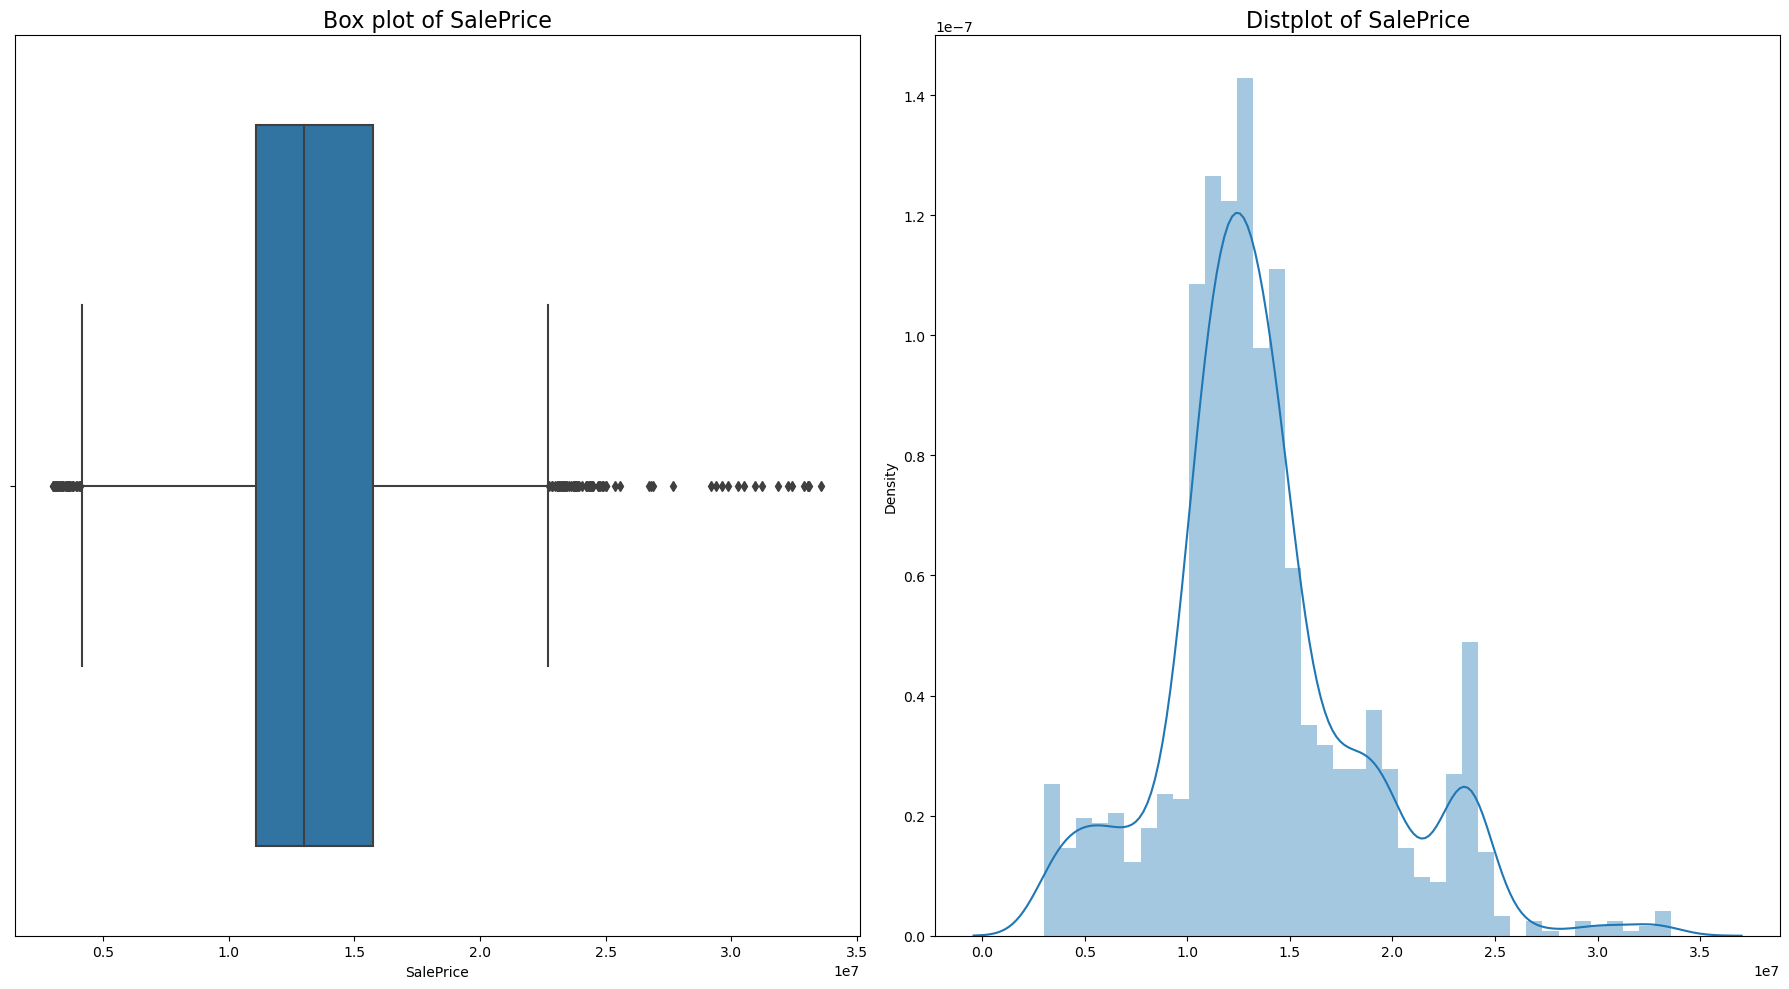

In [46]:
box_dist_plot(df, 'SalePrice')

In [47]:
df.loc[df['SalePrice']>30000000].sort_values(by = 'SalePrice', ascending = False)

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,text_MucDoHaiLong,text_YeuToThuongHieuSP,text_YeuToCauHinh,text_YeuToTocDoXuLy,text_YeuToGia,text_YeuToThietKe,text_YeuToUyTinNhaBanle,text_YeuToBaoMat,text_YeuToBaoHanh,text_YeuToKhuyenMai,DiemTinhNang
1030,CTM69132,Nam,Hồ Chí Minh,Năm 3,Ngoại thương,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc",4,3,2,4,4,5,3,3,4,4,OTS826,Offline,Thẻ,Apple,Phong Vũ,Có,33579015.0,2020-11-01,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội",RatQuanTrongMucDoHaiLong,ThuongHieuSPBinhThuong,KhongQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,UyTinNhaBanleBinhThuong,BaoMatBinhThuong,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-KhongQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
496,CTM38854,Nam,Đà Nẵng,Năm 1,Luật kinh tế,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Dưới 6 tháng,"Học tập, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",4,4,3,4,4,4,2,4,5,5,OTS45939,Online,Thẻ,MSI,Viễn thông A,Không,33092715.0,2020-12-23,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,KhongQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-KhongQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
217,CTM22262,Nam,Hồ Chí Minh,Năm 2,Quản trị dịch vụ du lịch và lữ hành,Công chức nhà nước,Trên 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",5,5,5,5,5,5,5,5,5,5,OTS645,Offline,Tiền mặt,Apple,Khác,Có,33068400.0,2020-06-21,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, Phương tiện truyền thông (báo, tivi,...), Website",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
1298,CTM85083,Nam,Thanh Hóa,Năm 4,Quản trị tài chính,Nông dân,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc",3,4,3,3,4,2,4,1,3,3,OTS85053,Online,Thẻ,Asus,Nguyễn Kim,Không,33068400.0,2020-08-21,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội",MucDoHaiLongBinhThuong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,KhongQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,KhongQuanTrongBaoMat,BaoHanhBinhThuong,KhuyenMaiBinhThuong,MucDoHaiLongBinhThuong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-TocDoXuLyBinhThuong-RatQuanTrongGia-KhongQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-BaoHanhBinhThuong-KhuyenMaiBinhThuong
185,CTM20315,Nữ,Hồ Chí Minh,Năm 3,Ngoại thương,Công chức nhà nước,Từ 3.000.000 đến 5.000.000,Từ 1 năm đến 2 năm,"Học tập, Giải trí (xem phim, nghe nhạc, lướt web)",5,5,3,3,4,5,5,4,5,4,OTS385,Online,Thẻ,Apple,FPT Shop,Có,32873880.0,2020-03-06,"Thông qua người thân, bạn bè",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,RatQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongTh

# Xử lý các giá trị NaN

In [48]:
check_null_data(df)

 Bảng Dữ Liệu Thống Kê Các Cột Dữ Liệu Có Chứa Giá Trị Null 


,Columnn,ColumnNullCount,ColumnNUllPercent
19,OrderID,7,0.447
23,Shop,5,0.319
20,Channel,3,0.192
22,Brand,2,0.128
25,SalePrice,2,0.128
27,Reference,2,0.128
21,PaymentType,2,0.128


In [49]:
df[df['SalePrice'].isnull()]

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,text_MucDoHaiLong,text_YeuToThuongHieuSP,text_YeuToCauHinh,text_YeuToTocDoXuLy,text_YeuToGia,text_YeuToThietKe,text_YeuToUyTinNhaBanle,text_YeuToBaoMat,text_YeuToBaoHanh,text_YeuToKhuyenMai,DiemTinhNang
46,CTM12491,Nam,Kon Tum,Năm 3,Tài chính doanh nghiệp,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)",3,2,4,4,5,2,3,2,4,3,OTS512,Offline,Thẻ,NaN,Thế giới di động,Không,NaN,2020-12-10,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội, Phương tiện truyền thông (báo, tivi,...)",MucDoHaiLongBinhThuong,KhongQuanTrongThuongHieuSP,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,KhongQuanTrongThietKe,UyTinNhaBanleBinhThuong,KhongQuanTrongBaoMat,RatQuanTrongBaoHanh,KhuyenMaiBinhThuong,MucDoHaiLongBinhThuong-KhongQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-KhongQuanTrongThietKe-UyTinNhaBanleBinhThuong-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-KhuyenMaiBinhThuong
1503,CTM96337,Nam,Hồ Chí Minh,Năm 3,Quản trị Marketing,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc",2,3,3,3,4,4,4,3,4,3,OTS43581,Offline,Tiền mặt,NaN,Techcare,Không,NaN,2020-12-09,"Nhờ người có chuyên môn tư vấn, Nhân viên cửa hàng bán Laptop",KhongQuanTrongMucDoHaiLong,ThuongHieuSPBinhThuong,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,BaoMatBinhThuong,RatQuanTrongBaoHanh,KhuyenMaiBinhThuong,KhongQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-BaoMatBinhThuong-RatQuanTrongBaoHanh-KhuyenMaiBinhThuong


__Nhận xét__

Có 2 giá trị Nan của SalePrice chưa được xử lý vì không có dữ liệu về Brand trong khi Brand là yếu  tố quan trọng để xử lý outlier bởi vì cách biệt giữa các hãng laptop với nhau là khá lớn cho nên đối với 2 giá trị trong Brand ta có thể loại bỏ đi

In [50]:
# Tiến hành loại bỏ các mẫu dữ liệu không có dữ liệu về Brand
print('Before Drop Na Of SalePrice, Length of Data is ', df.shape[0])
df.drop(df.loc[df['SalePrice'].isnull()].index, axis = 0, inplace= True)
print('After Drop Na Of SalePrice, Length of Data is ', df.shape[0])

Before Drop Na Of SalePrice, Length of Data is  1566
After Drop Na Of SalePrice, Length of Data is  1564


In [51]:
# Xử lý giá trị null cho cột OrderId
OrderIdNull = df.loc[df['OrderID'].isnull()]
OrderIdNull

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,text_MucDoHaiLong,text_YeuToThuongHieuSP,text_YeuToCauHinh,text_YeuToTocDoXuLy,text_YeuToGia,text_YeuToThietKe,text_YeuToUyTinNhaBanle,text_YeuToBaoMat,text_YeuToBaoHanh,text_YeuToKhuyenMai,DiemTinhNang
88,CTM14696,Nữ,Quảng Trị,Năm 4,Kế toán,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,2,2,3,2,4,2,3,4,NaN,Offline,Tiền mặt,MSI,Techcare,Có,9852000.0,2020-04-24,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Nhân viên cửa hàng bán Laptop, Phương tiện truyền thông (báo, tivi,...)",RatQuanTrongMucDoHaiLong,RatQuanTrongThuongHieuSP,KhongQuanTrongCauHinh,KhongQuanTrongTocDoXuLy,GiaBinhThuong,KhongQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,KhongQuanTrongBaoMat,BaoHanhBinhThuong,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-KhongQuanTrongCauHinh-KhongQuanTrongTocDoXuLy-GiaBinhThuong-KhongQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-BaoHanhBinhThuong-RatQuanTrongKhuyenMai
239,CTM23314,Nam,Đà Nẵng,Năm 3,Toán kinh tế,Kinh doanh tự do,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Chơi game",4,3,5,5,4,2,3,2,4,5,NaN,Offline,Tiền mặt,HP,Phong Vũ,Có,11107000.0,2020-10-03,"Thông qua người thân, bạn bè",RatQuanTrongMucDoHaiLong,ThuongHieuSPBinhThuong,RatQuanTrongCauHinh,RatQuanTrongTocDoXuLy,RatQuanTrongGia,KhongQuanTrongThietKe,UyTinNhaBanleBinhThuong,KhongQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-KhongQuanTrongThietKe-UyTinNhaBanleBinhThuong-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
727,CTM52837,Nữ,Quảng Bình,Năm 4,Quản trị khách sạn,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)",3,3,3,3,4,4,4,2,3,4,NaN,Offline,Thẻ,MSI,Viễn thông A,Có,20305000.0,2020-08-15,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Mạng xã hội, Website",MucDoHaiLongBinhThuong,ThuongHieuSPBinhThuong,CauHinhBinhThuong,TocDoXuLyBinhThuong,RatQuanTrongGia,RatQuanTrongThietKe,RatQuanTrongUyTinNhaBanle,KhongQuanTrongBaoMat,BaoHanhBinhThuong,RatQuanTrongKhuyenMai,MucDoHaiLongBinhThuong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-BaoHanhBinhThuong-RatQuanTrongKhuyenMai
768,CTM55484,Nữ,Hà Nội,Năm 4,Kế toán,Kinh doanh tự do,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",3,4,2,3,4,4,3,2,4,4,NaN,Offline,Thẻ,HP,Viễn thông A,Có,12377000.0,2020-12-20,"Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop, Mạng xã hội, Phương tiện truyền thông (báo, tivi,...)",MucDoHaiLongBinhThuong,RatQuanTrongThuongHieuSP,KhongQuanTrongCauHinh,TocDoXuLyBinhThuong,RatQuanTrongGia,RatQuanTrongThietKe,UyTinNhaBanleBinhThuong,KhongQuanTrongBaoMat,RatQuanTrongBaoHanh,RatQuanTrongKhuyenMai,MucDoHaiLongBinhThuong-RatQuanTrongThuongHieuSP-KhongQuanTrongCauHinh-TocDoXuLyBinhThuong-RatQuanTrongGia-RatQuanTrongThietKe-UyTinNhaBanleBinhThuong-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai
1256,CTM83049,Nam,Hà Nội,Năm 3,Thương mại điện tử,Công chức nhà nước,Từ 1.500.000 đến 3.000.000,Từ 1 năm đến 2 năm,Học tập,4,2,3,4,2,3,4,2,3,4,NaN,Online,Thẻ,Asus,Viễn thông A,Có,10177000.0,2020-08-18,"Thông qua người thân, bạn bè, Nhờ người có chuyên môn tư vấn, Mạng xã hội",RatQuanTrongMucDoHaiLong,KhongQuanTrongThuongHieuSP,CauHinhBinhThuong,RatQuanTrongTocDoXuLy,KhongQuanTrongGia,ThietKeBinhThuong,RatQuanTrongUyTinNhaBanle,KhongQuanTrongBaoMat,BaoHanhBinhThuong,RatQuanTrongKhuyenMai,RatQuanTrongMucDoHaiLong-KhongQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQua

In [52]:
df['Numid'] = df['OrderID'].dropna().str.extract('OTS(\d+)').astype(int)

df['OTS'] = 'OTS'

OrderIdNullIndex = df.loc[df['Numid'].isnull()].index.to_list()

for i in OrderIdNullIndex:
    x = np.random.randint(np.min(OrderIdNullIndex), np.max(OrderIdNullIndex))
    if x not in OrderIdNullIndex:
        df.loc[df.index == i, 'Numid'] = x
        
df['OrderID'] = df['OTS'] + df['Numid'].astype('str')

df.drop(['OTS', 'Numid'], axis=1, inplace = True)

df['OrderID'].isnull().sum()

0

In [53]:
#Xử lý giá trị null cho các cột 'Shop', 'Channel', 'PaymentType', 'Reference

extant_null_column = ['Shop', 'Channel', 'PaymentType', 'Reference']

for column in extant_null_column:
    df[column] = df[column].fillna(df[column].mode()[0])

In [54]:
check_null_data(df)

 Bảng Dữ Liệu Thống Kê Các Cột Dữ Liệu Có Chứa Giá Trị Null 
       GIÁ TRỊ NULL KHÔNG TỒN TẠI TRONG DATAFRAME NÀY       
Hãy thử với DataFrame khác
            ==================END===============            


# Feature Engineering

In [55]:
np.histogram(df['SalePrice'], bins = 10)

(array([ 96,  80, 424, 542, 152, 119, 117,  17,   7,  10], dtype=int64),
 array([ 3020000. ,  6075901.5,  9131803. , 12187704.5, 15243606. ,
        18299507.5, 21355409. , 24411310.5, 27467212. , 30523113.5,
        33579015. ]))

In [56]:
df['KhoangTienChi'] = pd.cut(df['SalePrice'], bins = 10)

In [57]:
df['MucDichSuDungLaptop'].unique()

array(['Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác',
       'Học tập, Làm việc, Chơi game', 'Học tập, Làm việc',
       'Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Học tập, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Học tập, Chơi game', 'Học tập', 'Làm việc, Chơi game', 'Làm việc',
       'Học tập, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Chơi game, Khác',
       'Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web), Khác',
       'Giải trí (xem phim, nghe nhạc, lướt web)',
       'Học tập, Làm việc, Khác', 'Khác', 'Học tập, Chơi game, Khác',
       'Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)',
       'Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)', 'Chơi game',
       'Học tập, Làm việc, Chơi game, Khác',
       'Học tập, Chơ

In [58]:
df['CoHocTap'] = df['MucDichSuDungLaptop'].apply(lambda x: 1 if 'học tập' in x.lower() else 0)

df['CoLamViec'] = df['MucDichSuDungLaptop'].apply(lambda x: 1 if 'làm việc' in x.lower() else 0)

df['CoChoiGame'] = df['MucDichSuDungLaptop'].apply(lambda x: 1 if 'chơi game' in x.lower() else 0)

df['CoGiaiTri(xemphim, nghenhac, luotweb)'] = df['MucDichSuDungLaptop'].apply(lambda x: 1 if 'giải trí' in x.lower() else 0)

df['CoCacHoatDongKhac'] = df['MucDichSuDungLaptop'].apply(lambda x: 1 if 'khác' in x.lower() else 0)

df.drop('MucDichSuDungLaptop', axis = 1, inplace = True)

In [59]:
unique_value(df, ['CoHocTap','CoLamViec','CoChoiGame','CoGiaiTri(xemphim, nghenhac, luotweb)', 'CoCacHoatDongKhac'])


Unique of CoHocTap:
 1 0

Unique of CoLamViec:
 1 0

Unique of CoChoiGame:
 1 0

Unique of CoGiaiTri(xemphim, nghenhac, luotweb):
 1 0

Unique of CoCacHoatDongKhac:
 1 0


In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

Mucdich = df[['CoHocTap', 'CoLamViec', 'CoChoiGame', 'CoGiaiTri(xemphim, nghenhac, luotweb)', 'CoCacHoatDongKhac', 'SalePrice']]

BestFeatures2 = SelectKBest(score_func = f_regression, k='all')

fit2 = BestFeatures2.fit(Mucdich.drop('SalePrice', axis = 1), Mucdich['SalePrice'])

scores2 = pd.Series(fit2.scores_, index = Mucdich.drop('SalePrice', axis = 1).columns)

scores2 = scores2.sort_values(ascending=False)

print('Bảng phân tích điểm số tác động giữa các mục đích sử dụng laptop với SalePrice'.upper().center(60))
display(scores2)

BẢNG PHÂN TÍCH ĐIỂM SỐ TÁC ĐỘNG GIỮA CÁC MỤC ĐÍCH SỬ DỤNG LAPTOP VỚI SALEPRICE


CoChoiGame                               56.557802
CoLamViec                                17.538056
CoHocTap                                 11.730336
CoCacHoatDongKhac                         5.569899
CoGiaiTri(xemphim, nghenhac, luotweb)     0.479933
dtype: float64

__Nhận xét:__

Trong các mục đích sử dụng mục đích chơi game tác động mạnh nhất đến với giá bán. Vì thế cửa hàng có thể bán được các loại laptop có mức giá cao nếu khách quan quan tâm nhiều đến cấu hình, tốc độ xử lý và khách hàng có chơi game. Nhân viên cửa hàng có thể tìm hiểu một số thể loại game nổi tiếng trên thị trường cũng như cấu hình máy có thể đáp ứng những thể loại game đó từ đó có kiến thức để cung cấp thông tin cho khách hàng tăng khả năng chốt deal cho những dòng máy có giá trị cao

In [61]:
Purpose_columns = df.filter(like='Co').columns.tolist()
print('Các cột được mã hóa theo thứ tự:\n', Purpose_columns)

def purpose(x, columns):
    result = '-'.join([str(x[col]) for col in columns])
    return result

df['Mucdich'] = df.apply(purpose, columns= Purpose_columns, axis=1)
df['Mucdich'].head()

Các cột được mã hóa theo thứ tự:
 ['CoHocTap', 'CoLamViec', 'CoChoiGame', 'CoGiaiTri(xemphim, nghenhac, luotweb)', 'CoCacHoatDongKhac']


0    1-1-1-1-1
1    1-1-1-0-0
2    1-1-0-0-0
3    1-1-0-0-0
4    1-1-0-0-0
Name: Mucdich, dtype: object

# Phân tích chi tiết từ đó trả lời câu hỏi của doanh nghiệp

In [62]:
final_data = df[['ChuyenNganh', 'NgheNghiepGiaDinh', 'ChiTieuHangThang', 'Brand', 'DiemTinhNang','Mucdich','SalePrice', 'KhoangTienChi']]
final_data.head(5)

,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,Brand,DiemTinhNang,Mucdich,SalePrice,KhoangTienChi
0,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Apple,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-GiaBinhThuong-ThietKeBinhThuong-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-BaoHanhBinhThuong-KhuyenMaiBinhThuong,1-1-1-1-1,3020000.0,"(2989440.985, 6075901.5]"
1,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Dell,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,1-1-1-0-0,18310000.0,"(18299507.5, 21355409.0]"
2,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,MSI,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,1-1-0-0-0,12203000.0,"(12187704.5, 15243606.0]"
3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Asus,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,1-1-0-0-0,13070000.0,"(12187704.5, 15243606.0]"
4,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Acer,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-CauHinhBinhThuong-RatQuanTrongTocDoXuLy-RatQuanTrongGia-ThietKeBinhThuong-RatQuanTrongUyTinNhaBanle-KhongQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,1-1-0-0-0,10172000.0,"(9131803.0, 12187704.5]"


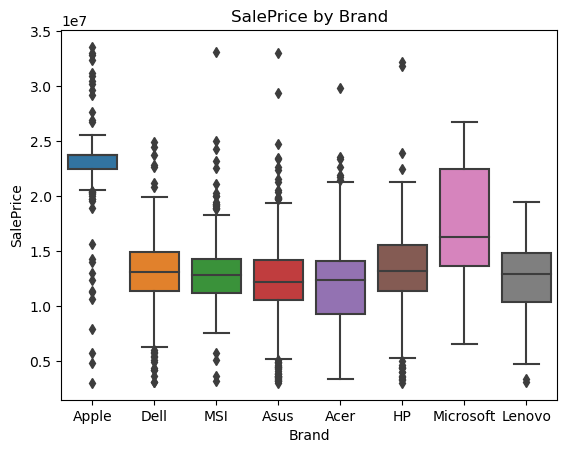

In [63]:
sns.boxplot(x = 'Brand', y = 'SalePrice', data = final_data)
plt.title('SalePrice by Brand')
plt.show()

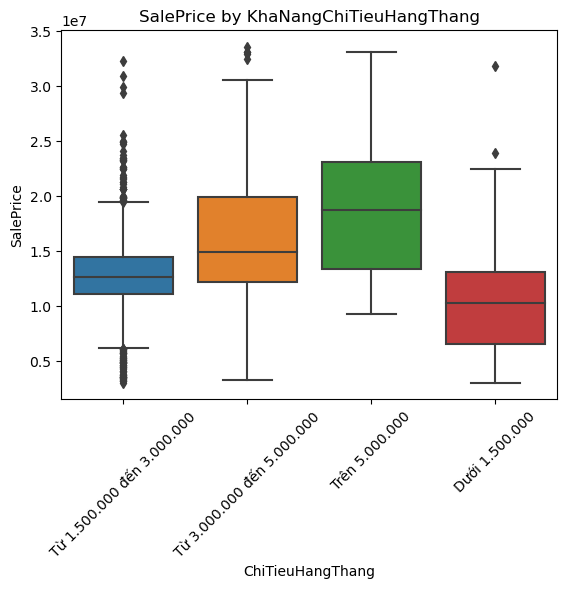

In [64]:
sns.boxplot(x = 'ChiTieuHangThang', y = 'SalePrice', data = final_data)
plt.xticks(rotation = 45)
plt.title('SalePrice by KhaNangChiTieuHangThang')
plt.show()

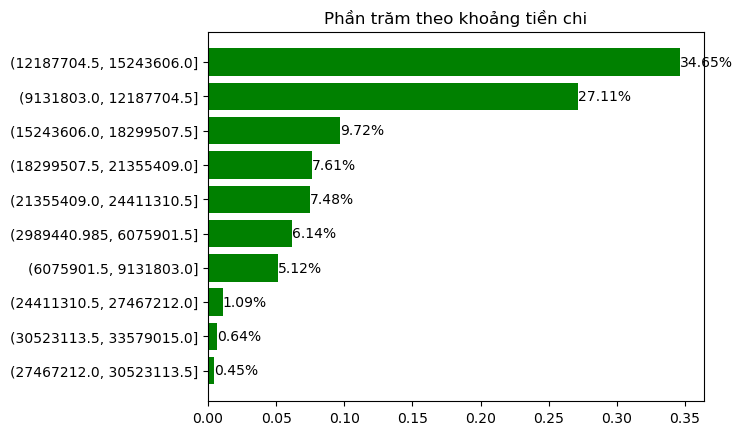

In [65]:
import matplotlib.pyplot as plt

counts = final_data['KhoangTienChi'].value_counts(ascending=True, normalize=True)

fig, ax = plt.subplots()

# Chuyển đổi kiểu dữ liệu của cột 'KhoangTienChi' thành chuỗi
labels = counts.index.astype(str)

# Vẽ biểu đồ barh
ax.barh(labels, counts.values, color = 'green')

# Hiển thị nhãn trên mỗi cột
for i, v in enumerate(counts.values):
    ax.text(v, i, f'{v:.2%}', va='center')
    
plt.title('Phần trăm theo khoảng tiền chi')

plt.show()

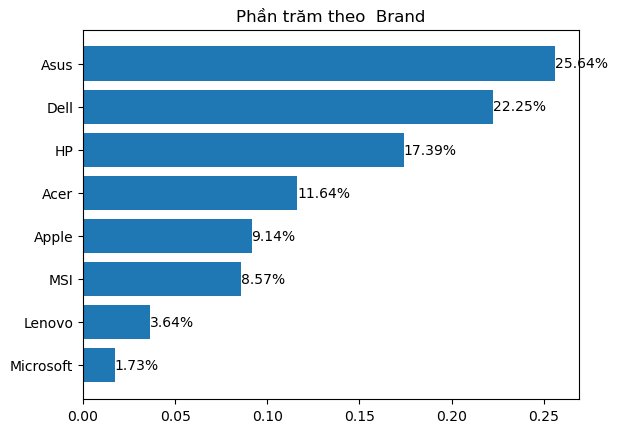

In [66]:
import matplotlib.pyplot as plt

counts = final_data['Brand'].value_counts(ascending=True, normalize=True)

fig, ax = plt.subplots()

# Chuyển đổi kiểu dữ liệu của cột 'KhoangTienChi' thành chuỗi
labels = counts.index.astype(str)

# Vẽ biểu đồ barh
ax.barh(labels, counts.values)

# Hiển thị nhãn trên mỗi cột
for i, v in enumerate(counts.values):
    ax.text(v, i, f'{v:.2%}', va='center')
    
plt.title('Phần trăm theo  Brand')

plt.show()

In [67]:
def categorical_with_categorical(df, *columns, limit = 30):
    
    catedf = df.groupby(list(columns)).size().sort_values(ascending=False).reset_index()
    
    catedf.columns = list(columns) + ['Soluong']
    
    catedf['PhanTramSoLuong'] = catedf['Soluong'].apply(lambda x: round((x/df.shape[0])*100, 2))
    
    catedf = catedf.loc[catedf['Soluong'] > limit, :]
    
    return catedf

In [68]:
# Xây dựng Bảng Thống kê số lượng sản phẩm bán ra của từng nhãn hiệu với khoảng tiền chi của khách hàng tương ứng
print('***************************************************************')
print('Bảng Thống kê số lượng sản phẩm bán ra của từng nhãn hiệu với khoảng tiền chi của khách hàng tương ứng'.upper())
print('***************************************************************')
categorical_with_categorical(final_data,'Brand', 'KhoangTienChi')

***************************************************************
BẢNG THỐNG KÊ SỐ LƯỢNG SẢN PHẨM BÁN RA CỦA TỪNG NHÃN HIỆU VỚI KHOẢNG TIỀN CHI CỦA KHÁCH HÀNG TƯƠNG ỨNG
***************************************************************


,Brand,KhoangTienChi,Soluong,PhanTramSoLuong
0,Asus,"(12187704.5, 15243606.0]",145,9.27
1,Asus,"(9131803.0, 12187704.5]",144,9.21
2,Dell,"(12187704.5, 15243606.0]",139,8.89
3,Dell,"(9131803.0, 12187704.5]",102,6.52
4,HP,"(12187704.5, 15243606.0]",100,6.39
5,Apple,"(21355409.0, 24411310.5]",92,5.88
6,HP,"(9131803.0, 12187704.5]",75,4.80
7,Acer,"(12187704.5, 15243606.0]",70,4.48
8,MSI,"(12187704.5, 15243606.0]",57,3.64
9,Dell,"(15243606.0, 18299507.5]",48,3.07


In [69]:
# Xây dựng Bảng Thống kê số lượng sản phẩm bán ra của từng nhãn hiệu với chi tiêu hàng tháng với khoản tiền chi của khách hàng tương ứng
print('***************************************************************')
print('Bảng Thống kê số lượng sản phẩm bán ra của từng nhãn hiệu với chi tiêu hàng tháng với khoản tiền chi của khách hàng tương ứng'.upper())
print('***************************************************************')
categorical_with_categorical(final_data, 'Brand','ChiTieuHangThang', 'KhoangTienChi', limit = 10)

***************************************************************
BẢNG THỐNG KÊ SỐ LƯỢNG SẢN PHẨM BÁN RA CỦA TỪNG NHÃN HIỆU VỚI CHI TIÊU HÀNG THÁNG VỚI KHOẢN TIỀN CHI CỦA KHÁCH HÀNG TƯƠNG ỨNG
***************************************************************


,Brand,ChiTieuHangThang,KhoangTienChi,Soluong,PhanTramSoLuong
0,Dell,Từ 1.500.000 đến 3.000.000,"(12187704.5, 15243606.0]",106,6.78
1,Asus,Từ 1.500.000 đến 3.000.000,"(12187704.5, 15243606.0]",106,6.78
2,Asus,Từ 1.500.000 đến 3.000.000,"(9131803.0, 12187704.5]",99,6.33
3,Dell,Từ 1.500.000 đến 3.000.000,"(9131803.0, 12187704.5]",71,4.54
4,Apple,Từ 3.000.000 đến 5.000.000,"(21355409.0, 24411310.5]",67,4.28
5,HP,Từ 1.500.000 đến 3.000.000,"(12187704.5, 15243606.0]",64,4.09
6,HP,Từ 1.500.000 đến 3.000.000,"(9131803.0, 12187704.5]",51,3.26
7,Acer,Từ 1.500.000 đến 3.000.000,"(12187704.5, 15243606.0]",50,3.20
8,MSI,Từ 1.500.000 đến 3.000.000,"(12187704.5, 15243606.0]",32,2.05
9,Asus,Từ 3.000.000 đến 5.000.000,"(12187704.5, 15243606.0]",32,2.05


In [70]:
final_data.loc[final_data['ChiTieuHangThang'] == 'Trên 5.000.000'].groupby(['ChiTieuHangThang','Brand', 'KhoangTienChi']).size().sort_values(ascending = False).reset_index().iloc[0,:]

ChiTieuHangThang              Trên 5.000.000
Brand                                  Apple
KhoangTienChi       (21355409.0, 24411310.5]
0                                         19
Name: 0, dtype: object

In [71]:
# Xây dựng Bảng Thống kê số lượng sản phẩm bán ra tương ứng với mục đích và khoản tiền chi
print('***************************************************************')
print('Bảng Thống kê số lượng sản phẩm bán ra tương ứng với mục đích và khoản tiền chi'.upper())
print('***************************************************************')
categorical_with_categorical(final_data,'Mucdich', 'KhoangTienChi', limit = 30)

***************************************************************
BẢNG THỐNG KÊ SỐ LƯỢNG SẢN PHẨM BÁN RA TƯƠNG ỨNG VỚI MỤC ĐÍCH VÀ KHOẢN TIỀN CHI
***************************************************************


,Mucdich,KhoangTienChi,Soluong,PhanTramSoLuong
0,1-1-0-1-0,"(12187704.5, 15243606.0]",104,6.65
1,1-0-0-0-0,"(12187704.5, 15243606.0]",96,6.14
2,1-1-0-0-0,"(12187704.5, 15243606.0]",94,6.01
3,1-0-0-0-0,"(9131803.0, 12187704.5]",86,5.50
4,1-1-0-0-0,"(9131803.0, 12187704.5]",73,4.67
5,1-1-0-1-0,"(9131803.0, 12187704.5]",66,4.22
6,1-1-1-1-0,"(12187704.5, 15243606.0]",65,4.16
7,1-0-0-1-0,"(12187704.5, 15243606.0]",56,3.58
8,1-1-1-1-0,"(9131803.0, 12187704.5]",51,3.26
9,1-0-0-1-0,"(9131803.0, 12187704.5]",47,3.01


In [72]:
final_data.loc[final_data['Mucdich'] == '1-1-1-1-1'].groupby(['Mucdich', 'KhoangTienChi']).size().sort_values(ascending = False)

Mucdich    KhoangTienChi           
1-1-1-1-1  (9131803.0, 12187704.5]     17
           (12187704.5, 15243606.0]    14
           (15243606.0, 18299507.5]     9
           (21355409.0, 24411310.5]     7
           (18299507.5, 21355409.0]     6
           (2989440.985, 6075901.5]     3
           (6075901.5, 9131803.0]       1
           (24411310.5, 27467212.0]     1
           (27467212.0, 30523113.5]     1
           (30523113.5, 33579015.0]     1
dtype: int64

In [73]:
# Xây dựng Bảng Thống kê số lượng sản phẩm bán ra tương ứng với điểm đánh giá các yếu tố cho sản phẩm và khoản tiền chi
print('***************************************************************')
print('Bảng Thống kê số lượng sản phẩm bán ra tương ứng với điểm đánh giá các yếu tố cho sản phẩm và khoản tiền chi'.upper())
print('***************************************************************')
categorical_with_categorical(final_data,'DiemTinhNang', 'KhoangTienChi', limit = 10)

***************************************************************
BẢNG THỐNG KÊ SỐ LƯỢNG SẢN PHẨM BÁN RA TƯƠNG ỨNG VỚI ĐIỂM ĐÁNH GIÁ CÁC YẾU TỐ CHO SẢN PHẨM VÀ KHOẢN TIỀN CHI
***************************************************************


,DiemTinhNang,KhoangTienChi,Soluong,PhanTramSoLuong
0,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,"(12187704.5, 15243606.0]",43,2.75
1,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,"(9131803.0, 12187704.5]",29,1.85
2,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,"(15243606.0, 18299507.5]",23,1.47
3,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,"(18299507.5, 21355409.0]",17,1.09
4,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-GiaBinhThuong-ThietKeBinhThuong-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-BaoHanhBinhThuong-KhuyenMaiBinhThuong,"(9131803.0, 12187704.5]",17,1.09
5,RatQuanTrongMucDoHaiLong-RatQuanTrongThuongHieuSP-RatQuanTrongCauHinh-RatQuanTrongTocDoXuLy-RatQuanTrongGia-RatQuanTrongThietKe-RatQuanTrongUyTinNhaBanle-RatQuanTrongBaoMat-RatQuanTrongBaoHanh-RatQuanTrongKhuyenMai,"(21355409.0, 24411310.5]",16,1.02
6,RatQuanTrongMucDoHaiLong-ThuongHieuSPBinhThuong-CauHinhBinhThuong-TocDoXuLyBinhThuong-GiaBinhThuong-ThietKeBinhThuong-UyTinNhaBanleBinhThuong-BaoMatBinhThuong-BaoHanhBinhThuong-KhuyenMaiBinhThuong,"(12187704.5, 15243606.0]",16,1.02


__Nhận xét:__

Như đã phân tích ở trên trong dataset này  laptop từ  9 đến 18 triệu chiếm số lượng lớn đến từ các hãng DELL, MSI, ASUS, ACER, HP, LENOVO. Trên mức 20 triệu thì có Apple

Phần lớn chi tiêu hàng tháng càng cao thì càng có khả năng, điều kiện để sỡ hữa  những chiếc laptop có giá cả cao hơn.

Chiếm phần lớn là các khoảng chi từ 12 triệu đến dưới  15 triệu 500 (35%), 9 triệu đến 12 triệu(27.11%). Thấp hơn là các khoảng từ 15 đến dưới 18 triệu500(10%), 18 đến dưới 21 triệu500 (8%) và 21 đến dưới 25 triệu (7.5%)
Với dataset này Asus, Dell, Hp  là ba hãng laptop chiếm sự lựa chọn lớn đến từ phía khách hàng với thị phần lần lượt là 25.64%, 22.25%, 17.39%. Theo sau là Acer(12%), Apple(9%)

Sắp xếp theo thị phần về khoảng tiền chi dành cho các nhãn hiệu:
* Từ 12 triệu đến dưới  15 triệu 500: ASUS > DELL > HP > ACER > MSI
* Từ 9 đến 12 triệu: ASUS > DELL > HP > ACER > MSI
* 21 đến dưới 25 triệu: APPLE
* Từ 15 đến dưới 18 triệu500: DELL > HP

Mặc khác chi tiêu hàng tháng từ 3 triệu đến 5 triệu thường chọn lựa các laptop từ nhà Apple với mức giá từ 21 triệu đến dưới 25 triệu Ngoài ra cũng có một số lựa chọn dành sự lựa chọn cho các hãng như Dell và Hp với mức giá từ 15 đến dưới 18 triệu500. Khoảng chi từ 1.5 đến 3 triệu thừa chọn các laptop chiếm số lượng phần lớn như Asus, Dell, Hp với các khoảng chi từ 9 đến dưới 15 triệu 500.  Đối với chi tiêu hàng tháng trên 5 triệu cũng chọn laptop đến từ hãng Apple với mức giá từ 21 đến dưới 25 triệu. Mặc khác nhân viên cửa hàng cần hiểu rõ khách hàng mong muốn nhãn hiệu là gì và khoảng chi tiêu hàng tháng của họ là bao nhiêu để tư vấn chiếc laptop cho phù hợp

Về mục đích sử dụng có những khách hàng họ dùng laptop để học, để làm việc, để chơi game, giải trí và cả các hoạt động khác nhưng khoảng tiền chi cũng trải dài từ 9 triệu đến dưới 18 triệu 500. Nhưng cũng có những khách hàng chỉ có học tập, hay chỉ có làm việc nhưng mức giá để chi cho chiếc laptop cũng tương tự như vậy. Mặc  khác có những khách hàng họ rất quan  trọng tất cả các  yếu tố của một chiếc laptop như mức độ hài lòng,  thương hiệu sản phẩm, thiết kế,... Nhưng có những khách hàng chỉ quan trọng một vài yếu tố nhưng mức giá cũng trải dài từ 9 đến dưới 25 triệu. Có nghĩa là khả năng chi trả phụ thuộc mạnh vào ngành học hiện tại của họ và khả năng chi tiêu hàng tháng của họ chứ không phải tập trung mạnh  vào mục đích sử dụng hay các yếu tố cần có của một chiếc laptop. Ta có thể dùng biến nhu cầu và các thang điểm đánh giá cho các yếu tố cần có của chiếc laptop để nâng họ lên cho các khoảng chi tiêu cao hơn. Ví dụ ban đầu họ chỉ dự định chi trong khoảng giá từ 9 đến 12 triệu. Nhưng sau khi xem xét những nhu cầu của họ  và điểm đánh giá chiếc laptop  ta có thể cân nhắc họ lên các mức chi tiêu cao hơn như từ 12 đến 15 triệu

==========================================================================================================================

__Kết luận trả lời câu hỏi Business:__

Cửa hàng nên nhập các sản phẩm có mức giá từ 9 đến dưới 15 triệu 500 vì đây là khoảng giá mà khách hàng có khả năng chi trả nhiều nhất. Mặc khác đối với khoảng giá này cửa hàng nên nhập các sản phẩm đến từ ASUS, DELL, HP bởi vì sản phẩm của 3 hãng này chiếm số lượng người mua nhiều nhất. Mặc khác với mức giá này rất phù hợp cho tệp đối tượng có chi tiêu hàng tháng từ 1.5 đến 3 triệu và từ 3 triệu đến 5 triệu (một số lượng ít) 2 tệp đối tượng chi tiêu này chiếm số lượng lớn trong tệp khách hàng

Ngoài ra để phù hợp với khách hàng có khoảng chi tiêu hàng tháng từ 3 đến 5 triệu và trên 5 triệu cửa hàng có thể nhập các sản phẩm đến từ nhà APPLE với mức giá từ khoảng 21 đến dưới 25 triệu hoặc để tăng tính đa dạng về các khoảng giá cửa hàng có thể nhập các sản phẩm đến từ nhà DELL và HP với mức giá trong khoảng từ 15 đến dưới 21 triệu 500

===========================================================================================================================

__Ngoài lề:__

Do lượng dataset khá ít và các đối tương dữ liệu mà cửa hàng thu thập được chủ yếu thuộc các chuyên ngành về xã hội cho nên các phân khúc giá cả không được đa dạng không phù hợp với toàn bộ các đối tượng sinh viên. Ngoài ra dataset khi thu thập có chứa rất nhiều outlier không hợp lệ, cửa hàng nên xem xét lại nguồn dữ liệu hoặc cách thức thu thập dữ liệu để dữ liệu đạt kết quả chính xác hơn